## Calculate a H$_2$O high-temperature spectrum with HITEMP

⚠️ *HITEMP CO2 computations require a lot of RAM. RADIS-Lab is lucky to be hosted on a https://notebooks.gesis.org binder with 8 GB RAM, which should be enough for medium-size ranges ! For large ranges, see the [Calculate a large spectrum](https://radis.readthedocs.io/en/latest/auto_examples/plot_merged_large_spectrum.html#sphx-glr-auto-examples-plot-merged-large-spectrum-py) on Radis documentation* 

For any help, refer to [RADIS documentation](https://radis.readthedocs.io) 

---

First let's initialize our RADIS environment, and the calculation conditions : 

## Databases 

The HITRAN database will be automatically downloaded. The HITEMP database files for H2O have been preconfigured in the RADIS [~/radis.json](../radis.json) config file. You can see the list of preconfigured databases with [printDatabankList()](https://radis.readthedocs.io/en/latest/gen_modules/radis.misc.config.html#radis.misc.config.printDatabankList). 


### Calculations

Let's initialize the plot environment : 

In [1]:
# Setup plots : use `%matplotlib widget` for interactive plots (zoom, etc.) but graphs will not appear on download.
%matplotlib inline


Now let's calculate the spectra with [calc_spectrum](https://radis.readthedocs.io/en/latest/source/radis.lbl.calc.html#radis.lbl.calc.calc_spectrum) 

In [2]:
from radis import calc_spectrum
from astropy import units as u
s = calc_spectrum(wavenum_min = 2000 / u.cm, 
                  wavenum_max = 4000 / u.cm,
                  molecule = 'H2O',
                  isotope = '1,2,3',
                  pressure = 1.01325 * u.bar,
                  mole_fraction = 1,
                  path_length = 1 * u.cm,
                  Tgas=3000, 
                  databank='hitemp',
                  verbose=3,        # adding some extra info for the first computation
                  )
# without verbose=False this will show all the input parameters. 
# With verbose=2,3,etc... we get increasing number of details about the calculation. 

Generated dataframe from ['/home/jovyan/.radisdb/hitemp/H2O-01_02000-02250_HITEMP2010.hdf5', '/home/jovyan/.radisdb/hitemp/H2O-01_02250-02500_HITEMP2010.hdf5', '/home/jovyan/.radisdb/hitemp/H2O-01_02500-02750_HITEMP2010.hdf5', '/home/jovyan/.radisdb/hitemp/H2O-01_02750-03000_HITEMP2010.hdf5', '/home/jovyan/.radisdb/hitemp/H2O-01_03000-03250_HITEMP2010.hdf5', '/home/jovyan/.radisdb/hitemp/H2O-01_03250-03500_HITEMP2010.hdf5', '/home/jovyan/.radisdb/hitemp/H2O-01_03500-04150_HITEMP2010.hdf5'] in 14.34s (20900895 rows, 9 columns, 1504.86 MB)
HAPI version: 1.2.2.0
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2021 are now available in HAPI code

           MIT license: Copyright 2021 HITRAN team, see more at http://hitran.org. 

           If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcis

/srv/conda/envs/notebook/lib/python3.8/site-packages/radis/misc/warning.py:350: LinestrengthCutoffWarning: Estimated error after discarding lines is large: 0.05%. Consider reducing cutoff
  warnings.warn(WarningType(message))


... 26.84s - Applied linestrength cutoff
... 0.18s - Calculated lineshift


/srv/conda/envs/notebook/lib/python3.8/site-packages/radis/misc/warning.py:350: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))


... 4.28s - Calculate broadening HWHM
Sparsity (grid points/lines) = 0.0. Set sparse_dlm to False
... 0.05s - Generated Wavenumber Arrays
... Calculating line broadening (13832475 lines)
...... 0.35s - Precomputed DLM lineshapes (189)
Estimated time for calculating broadening: 7.71s on 1 CPU
...... 0.00s - Initialized vectors
...... 8.60s - Get closest matching line & fraction
...... 13.00s - Distribute lines over DLM
...... 2.92s - Convolve and sum on spectral range
... 24.91s - Calculated line broadening
... 0.02s - Calculated other spectral quantities
... 58.44s - Spectrum calculated (before object generation)
... 0.00s - Generated Spectrum object
58.44s - Spectrum calculated


And plot the results :

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Avant Garde, sans-serif


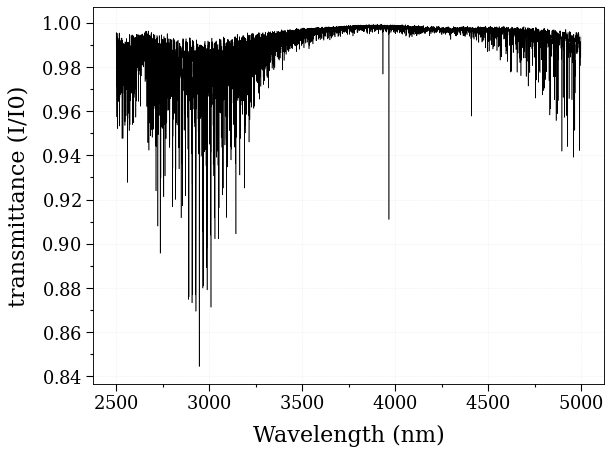

In [4]:
s.plot('transmittance_noslit', wunit='nm')